In [ ]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import h5py

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

warnings.filterwarnings('ignore')

In [2]:
street_view_house_numbers_data = h5py.File('SVHN_single_grey1.h5', 'r')

X_train = street_view_house_numbers_data['X_train'][:]
X_test = street_view_house_numbers_data['X_test'][:]
y_train = street_view_house_numbers_data['y_train'][:]
y_test = street_view_house_numbers_data['y_test'][:]

street_view_house_numbers_data.close()

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000,))

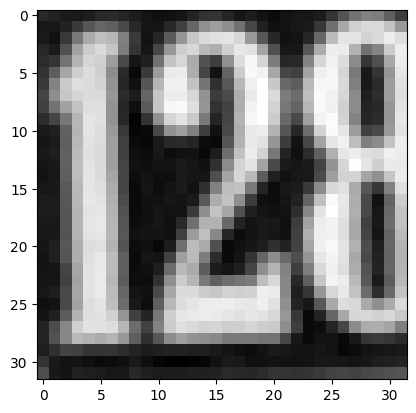

In [5]:
plt.imshow(X_train[0, :, :], cmap='gray')

In [6]:
y_train[0]

2

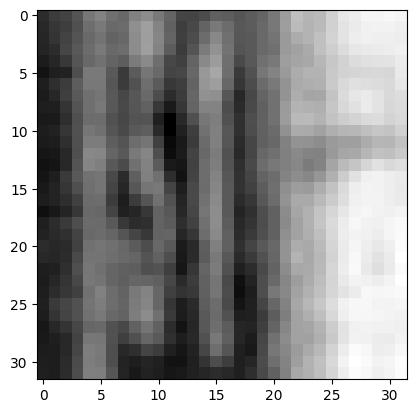

In [7]:
plt.imshow(X_test[0, :, :], cmap='gray')

In [8]:
y_test[0]

1

In [9]:
X_train_resize = np.zeros((42000, 28, 28))
X_test_resize = np.zeros((18000, 28, 28))

for i in range(42000):
    X_train_resize[i, :, :] = cv2.resize(X_train[i], dsize=(28, 28))
    
for i in range(18000):
    X_test_resize[i, :, :] = cv2.resize(X_test[i], dsize=(28, 28))

In [10]:
X_train_resize.shape, X_test_resize.shape

((42000, 28, 28), (18000, 28, 28))

In [11]:
X_train = np.expand_dims(X_train_resize, 3)
X_test = np.expand_dims(X_test_resize, 3)

X_train.shape, X_test.shape

((42000, 28, 28, 1), (18000, 28, 28, 1))

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train[0], y_test[0]

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [13]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [14]:
model.load_weights('number_model.h5')

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,722 (45.79 KB)

 Trainable params: 11,722 (45.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.evaluate(X_test, y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1487 - loss: 3.7225


[3.711923599243164, 0.1536666601896286]

In [18]:
print("Let's check the trainability of each layer.")
for layer in model.layers:
    print(layer.trainable)

Let's check the trainability of each layer.
True
True
True
True
True
True
True
True
True


In [19]:
for layer in model.layers:
    if('dense' not in layer.name):
        layer.trainable = False

In [20]:
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
True
True


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,722 (45.79 KB)

 Trainable params: 6,922 (27.04 KB)

 Non-trainable params: 4,800 (18.75 KB)

In [22]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2922 - loss: 2.0343 - val_accuracy: 0.3677 - val_loss: 1.8203
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3754 - loss: 1.7903 - val_accuracy: 0.3979 - val_loss: 1.7499
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3938 - loss: 1.7469 - val_accuracy: 0.4032 - val_loss: 1.7364
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4001 - loss: 1.7276 - val_accuracy: 0.4058 - val_loss: 1.7279
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4078 - loss: 1.7028 - val_accuracy: 0.4113 - val_loss: 1.7107


In [23]:
for layer in model.layers:
    print(layer.name, "->", layer.trainable)

conv2d -> False
max_pooling2d -> False
conv2d_1 -> False
max_pooling2d_1 -> False
conv2d_2 -> False
max_pooling2d_2 -> False
flatten -> False
dense -> True
dense_1 -> True


In [24]:
print("Now, instead of just unfreezing the FCs (fully connected layers), let us also unfreeze the last few convolutional layers.")
model.layers[2].trainable = True
model.layers[3].trainable = True
model.layers[4].trainable = True
model.layers[5].trainable = True
model.layers[6].trainable = True
for layer in model.layers:
    print(layer.name, "->", layer.trainable)

Now, instead of just unfreezing the FCs (fully connected layers), let us also unfreeze the last few convolutional layers.
conv2d -> False
max_pooling2d -> False
conv2d_1 -> True
max_pooling2d_1 -> True
conv2d_2 -> True
max_pooling2d_2 -> True
flatten -> True
dense -> True
dense_1 -> True


In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4128 - loss: 1.6927 - val_accuracy: 0.4161 - val_loss: 1.7013
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4184 - loss: 1.6754 - val_accuracy: 0.4216 - val_loss: 1.6832
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4207 - loss: 1.6695 - val_accuracy: 0.4298 - val_loss: 1.6697
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4306 - loss: 1.6562 - val_accuracy: 0.4302 - val_loss: 1.6696
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4342 - loss: 1.6448 - val_accuracy: 0.4269 - val_loss: 1.6731
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4326 - loss: 1.6481 - val_accuracy: 0.4278 - val_loss: 1.6655
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4299 - loss: 1.6472 - val_accuracy: 0.4339 - val_loss: 1.6530
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4400 - lo

In [28]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax'))

In [29]:
for layer in model.layers:
    print(layer.name, "->", layer.trainable)

conv2d_6 -> True
max_pooling2d_6 -> True
conv2d_7 -> True
max_pooling2d_7 -> True
dropout_1 -> True
conv2d_8 -> True
max_pooling2d_8 -> True
dropout_2 -> True
flatten_1 -> True
dense_2 -> True
dropout_3 -> True
dense_3 -> True


In [30]:
model.load_weights("number_model.h5")

In [31]:
for layer in model.layers:
    if("dense" not in layer.name):
        layer.trainable = False

In [32]:
model.layers[2].trainable = True

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3158 - loss: 1.9106 - val_accuracy: 0.5304 - val_loss: 1.6476
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3308 - loss: 1.8865 - val_accuracy: 0.5250 - val_loss: 1.6922
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3317 - loss: 1.8761 - val_accuracy: 0.5163 - val_loss: 1.6922
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3365 - loss: 1.8567 - val_accuracy: 0.5595 - val_loss: 1.6191
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3400 - loss: 1.8735 - val_accuracy: 0.5462 - val_loss: 1.6771
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3369 - loss: 1.8640 - val_accuracy: 0.5353 - val_loss: 1.6665
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3438 - loss: 1.8503 - val_accuracy: 0.5279 - val_loss: 1.6582
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3434 - loss: 1.8524 -